In [1]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82813 sha256=a12ef8c3945a3b14943c57d3809628f0f4eef4a6e1cfe476d522366229d0cb60
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55621 sha256=bf8a9f48b398fd7bfd51d76ddf139cf7207d801b691f2f7710830b379b2885a2
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

import umap.umap_ as umap

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/input_data/input_beach_full_data.csv")
data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/removed_data.csv")

In [5]:
data.describe()

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life
count,5.000000,5.000000,0.0,5.000000,5.00000,5.000000
mean,17.640000,8.330000,NaN,0.180000,3.80000,11.600000
std,2.382855,12.669594,NaN,0.107448,0.83666,0.707107
min,15.400000,0.740000,NaN,0.103000,3.00000,10.600000
25%,15.700000,1.340000,NaN,0.131000,3.00000,11.300000
50%,16.900000,2.960000,NaN,0.140000,4.00000,11.700000
75%,19.300000,5.900000,NaN,0.157000,4.00000,11.900000
max,20.900000,30.710000,NaN,0.369000,5.00000,12.500000


## Data Cleaning

In [6]:
# Count missing values in each column
print(data.isna().sum())

Beach Name                     0
Measurement Timestamp          0
Water Temperature              0
Turbidity                      0
Transducer Depth               5
Wave Height                    0
Wave Period                    0
Battery Life                   0
Measurement Timestamp Label    0
Measurement ID                 0
dtype: int64


In [7]:
# transducer column has many null values, so dropping it
data.drop(columns='Transducer Depth',inplace=True)

In [8]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [9]:
data['Measurement Timestamp'] = pd.to_datetime(data['Measurement Timestamp'])

In [10]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,2018-06-04 12:00:00,19.3,2.96,0.157,4,12.5,6/4/2018 12:00,OhioStreetBeach201806041200
1,Ohio Street Beach,2019-06-15 14:00:00,15.7,1.34,0.103,4,11.7,6/15/2019 14:00,OhioStreetBeach201906151400
2,Montrose Beach,2015-06-12 20:00:00,15.4,5.90,0.369,5,10.6,6/12/2015 20:00,MontroseBeach201506122000
3,Osterman Beach,2015-08-17 20:00:00,20.9,30.71,0.140,3,11.3,8/17/2015 20:00,OstermanBeach201508172000
4,Rainbow Beach,2015-09-08 14:00:00,16.9,0.74,0.131,3,11.9,9/8/2015 14:00,RainbowBeach201509081400


In [11]:
data.set_index('Measurement Timestamp')

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
Measurement Timestamp,,,,,,,,
2018-06-04 12:00:00,Ohio Street Beach,19.3,2.96,0.157,4,12.5,6/4/2018 12:00,OhioStreetBeach201806041200
2019-06-15 14:00:00,Ohio Street Beach,15.7,1.34,0.103,4,11.7,6/15/2019 14:00,OhioStreetBeach201906151400
2015-06-12 20:00:00,Montrose Beach,15.4,5.90,0.369,5,10.6,6/12/2015 20:00,MontroseBeach201506122000
2015-08-17 20:00:00,Osterman Beach,20.9,30.71,0.140,3,11.3,8/17/2015 20:00,OstermanBeach201508172000
2015-09-08 14:00:00,Rainbow Beach,16.9,0.74,0.131,3,11.9,9/8/2015 14:00,RainbowBeach201509081400


In [12]:
# Checking whether Measurement Timestamp column is datetime / timeseries column
pd.api.types.is_datetime64_any_dtype(data['Measurement Timestamp'])

True

In [13]:
data.columns

Index(['Beach Name', 'Measurement Timestamp', 'Water Temperature', 'Turbidity',
       'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID'],
      dtype='object')

Beach Name, Measurement Timestamp Label, and Measurement ID columns looks doubtful to me. rest all of the columns are useful

Useful columns: 'Measurement Timestamp', 'Water Temperature', 'Turbidity','Transducer Depth', 'Wave Height', 'Wave Period', 'Battery Life'

### Ouliers Detection

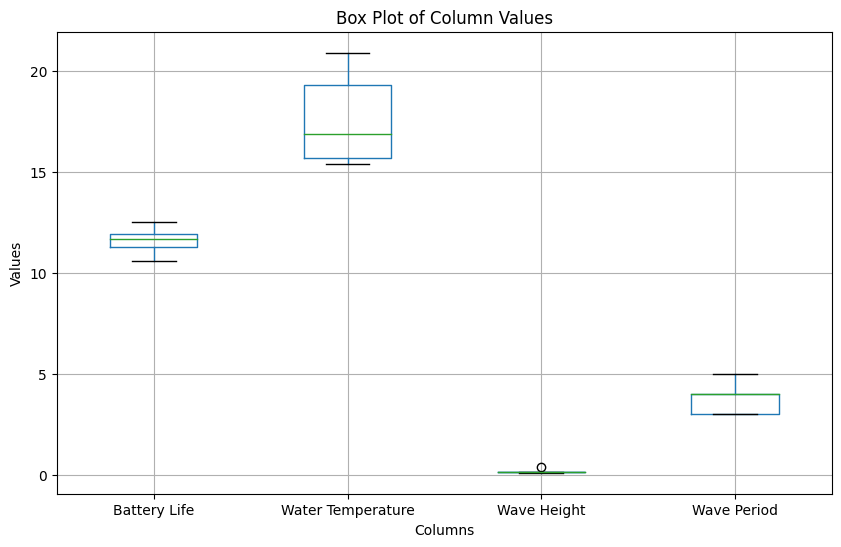

In [14]:
# Ouliers Detection

# Create box plots for each column in the DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

data[['Battery Life','Water Temperature','Wave Height','Wave Period']].boxplot()

# Set the title and labels
plt.title('Box Plot of Column Values')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

Few Values were in the range of -999 for Wave Height column. They does not look appropriate, so removing them.

In [15]:
data = data.drop(data.loc[data['Wave Height']<-999,:].index)

### Dropping unwanted columns
Dropping the columns **Beach Name, Measurement Timestamp Label,Measurement ID** because they are not numericals and are not helpful in dimensionality reduction.

In [16]:
data = data.drop(columns=['Measurement Timestamp Label','Measurement ID'])

In [17]:
data_sorted = data.sort_values(by=['Beach Name','Measurement Timestamp'])

In [18]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
2,Montrose Beach,2015-06-12 20:00:00,15.4,5.90,0.369,5,10.6
0,Ohio Street Beach,2018-06-04 12:00:00,19.3,2.96,0.157,4,12.5
1,Ohio Street Beach,2019-06-15 14:00:00,15.7,1.34,0.103,4,11.7
3,Osterman Beach,2015-08-17 20:00:00,20.9,30.71,0.140,3,11.3
4,Rainbow Beach,2015-09-08 14:00:00,16.9,0.74,0.131,3,11.9


In [19]:
data_sorted['Beach Name'].unique()

array(['Montrose Beach', 'Ohio Street Beach', 'Osterman Beach',
       'Rainbow Beach'], dtype=object)

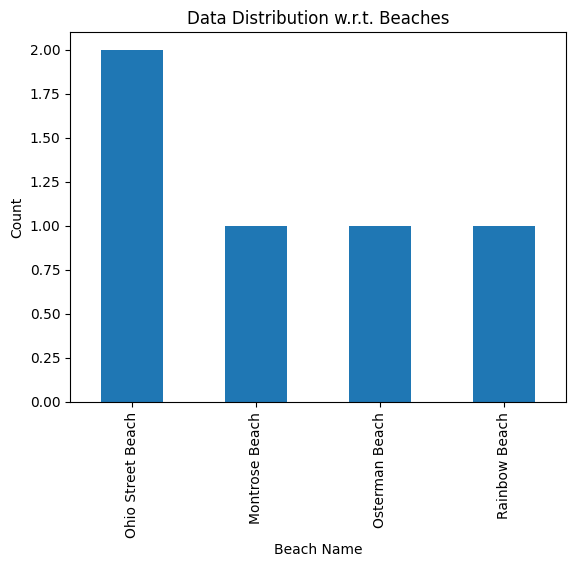

In [20]:
data_sorted['Beach Name'].value_counts().plot(kind='bar')
plt.xlabel('Beach Name')
plt.ylabel('Count')
plt.title('Data Distribution w.r.t. Beaches')
plt.show()

In [21]:
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Umap_Data_Manipulation/data_sorted.csv")

### Label Encoding
Performing label encoding to convert categorical data in Beach Name column to numeric

In [22]:
lblEn = LabelEncoder()

data_sorted['Beach Name'] =lblEn.fit_transform(data_sorted['Beach Name'])

In [24]:
lblEn.inverse_transform(np.array([0, 1, 2, 3]))
# lblEn.inverse_transform(np.array([0, 1, 2, 3, 4, 5]))
# data_sorted['Beach Name'].uni que()

array(['Montrose Beach', 'Ohio Street Beach', 'Osterman Beach',
       'Rainbow Beach'], dtype=object)

In [25]:
num_cols = ['Water Temperature','Turbidity','Wave Height','Wave Period','Battery Life']

In [26]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
2,0,2015-06-12 20:00:00,15.4,5.90,0.369,5,10.6
0,1,2018-06-04 12:00:00,19.3,2.96,0.157,4,12.5
1,1,2019-06-15 14:00:00,15.7,1.34,0.103,4,11.7
3,2,2015-08-17 20:00:00,20.9,30.71,0.140,3,11.3
4,3,2015-09-08 14:00:00,16.9,0.74,0.131,3,11.9


### Standardizing the numeric columns

In [27]:
scaler = StandardScaler()
data_sorted[num_cols] = scaler.fit_transform(data_sorted[num_cols])

In [28]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
2,0,2015-06-12 20:00:00,-1.051006,-0.214436,1.966617,1.603567,-1.581139
0,1,2018-06-04 12:00:00,0.778871,-0.473878,-0.239324,0.267261,1.423025
1,1,2019-06-15 14:00:00,-0.910247,-0.616836,-0.801214,0.267261,0.158114
3,2,2015-08-17 20:00:00,1.529590,1.974933,-0.416215,-1.069045,-0.474342
4,3,2015-09-08 14:00:00,-0.347207,-0.669783,-0.509864,-1.069045,0.474342


In [29]:
data_sorted.isna().sum()

Beach Name               0
Measurement Timestamp    0
Water Temperature        0
Turbidity                0
Wave Height              0
Wave Period              0
Battery Life             0
dtype: int64

### Converting the timestamp to numerical values

In [30]:
data_sorted['Measurement Timestamp'] = data_sorted['Measurement Timestamp'].apply(lambda x: x.timestamp())

In [31]:
data_sorted['Measurement Timestamp']

2    1.434139e+09
0    1.528114e+09
1    1.560607e+09
3    1.439842e+09
4    1.441721e+09
Name: Measurement Timestamp, dtype: float64

In [32]:
data_sorted.isna().sum()

Beach Name               0
Measurement Timestamp    0
Water Temperature        0
Turbidity                0
Wave Height              0
Wave Period              0
Battery Life             0
dtype: int64

### Processing Null values
There are few null values present in Wave Height and Wave Period Column, we need to fill them or else eliminate them. I am filling them using KNNImputer

In [33]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(data_sorted) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

# data_sorted=pd.DataFrame(data=np.round(new_array), columns=data_sorted.columns)
data_sorted=pd.DataFrame(data=new_array, columns=data_sorted.columns)

In [34]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,0.0,1.434139e+09,-1.051006,-0.214436,1.966617,1.603567,-1.581139
1,1.0,1.528114e+09,0.778871,-0.473878,-0.239324,0.267261,1.423025
2,1.0,1.560607e+09,-0.910247,-0.616836,-0.801214,0.267261,0.158114
3,2.0,1.439842e+09,1.529590,1.974933,-0.416215,-1.069045,-0.474342
4,3.0,1.441721e+09,-0.347207,-0.669783,-0.509864,-1.069045,0.474342


##UMAP

In [35]:
# Apply UMAP to the entire DataFrame

SEED = 43
reducer = umap.UMAP(random_state=SEED,
                    n_neighbors = 5,
                    n_components = 2,
                    min_dist = 0.7)
# reducer = umap.UMAP(random_state=SEED)

umap_result = reducer.fit_transform(data_sorted)

umap_result

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


array([[13.009689 ,  5.217385 ],
       [15.943619 ,  5.15965  ],
       [15.626643 ,  3.7796013],
       [14.354093 ,  5.846423 ],
       [14.000815 ,  4.2047358]], dtype=float32)

### Visualizing the UMAP output

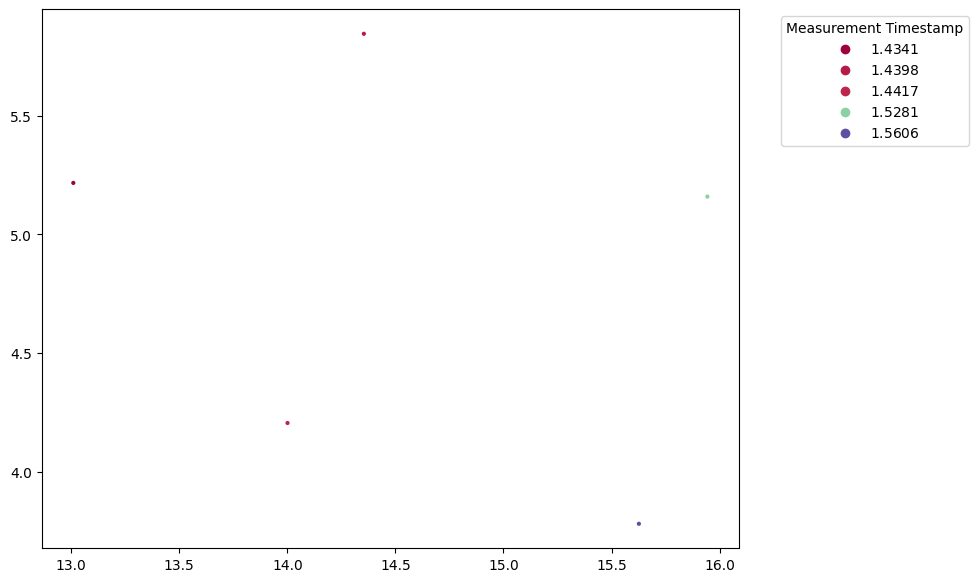

In [36]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted['Measurement Timestamp'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Measurement Timestamp',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

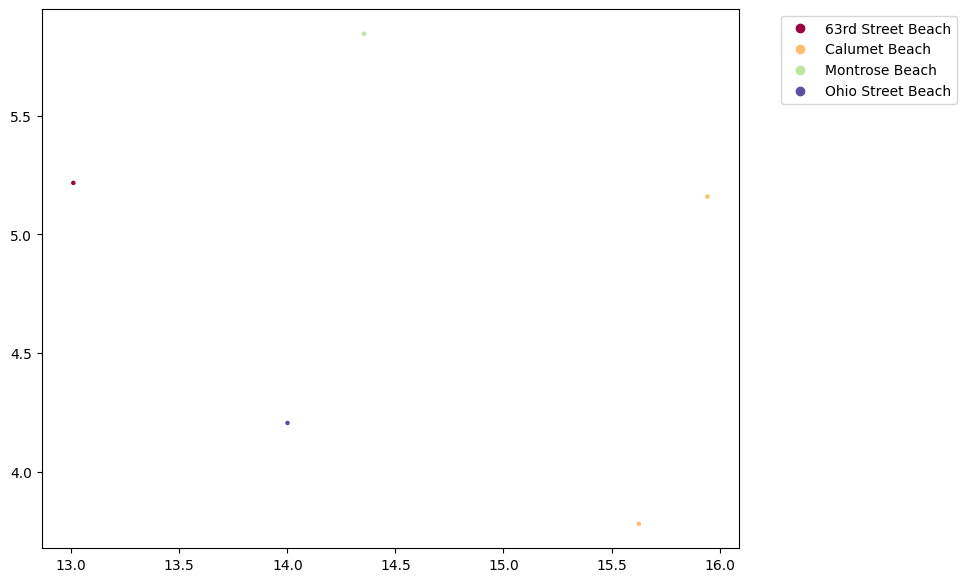

In [37]:
fig, ax = plt.subplots(figsize=(9, 7))


scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted['Beach Name'] , s=5, cmap='Spectral')

# Create a legend using the unique beach names
legend_labels = ['63rd Street Beach', 'Calumet Beach', 'Montrose Beach', 'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels,bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [38]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,0.0,1.434139e+09,-1.051006,-0.214436,1.966617,1.603567,-1.581139
1,1.0,1.528114e+09,0.778871,-0.473878,-0.239324,0.267261,1.423025
2,1.0,1.560607e+09,-0.910247,-0.616836,-0.801214,0.267261,0.158114
3,2.0,1.439842e+09,1.529590,1.974933,-0.416215,-1.069045,-0.474342
4,3.0,1.441721e+09,-0.347207,-0.669783,-0.509864,-1.069045,0.474342


### Exporting the UMAP output to excel

In [39]:
# Creating the dataframe from the array umap_result
# umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1','UMAP-2'])
umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1'])

In [40]:
umap_result_df

,UMAP-0,UMAP-1
0,13.009689,5.217385
1,15.943619,5.159650
2,15.626643,3.779601
3,14.354093,5.846423
4,14.000815,4.204736


In [41]:
# Saving the two pandas dataframes data_sorted_label_enc and umap_result_df into data_sorted_label_enc_out using concat function of pandas

data_sorted = pd.concat([data_sorted,umap_result_df], axis=1)

In [42]:
# Exporting the csv file
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/1/new.csv")

In [43]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,UMAP-0,UMAP-1
0,0.0,1.434139e+09,-1.051006,-0.214436,1.966617,1.603567,-1.581139,13.009689,5.217385
1,1.0,1.528114e+09,0.778871,-0.473878,-0.239324,0.267261,1.423025,15.943619,5.159650
2,1.0,1.560607e+09,-0.910247,-0.616836,-0.801214,0.267261,0.158114,15.626643,3.779601
3,2.0,1.439842e+09,1.529590,1.974933,-0.416215,-1.069045,-0.474342,14.354093,5.846423
4,3.0,1.441721e+09,-0.347207,-0.669783,-0.509864,-1.069045,0.474342,14.000815,4.204736


## Inverse_transform function to approximate the original data points


In [44]:
approximated_data = reducer.inverse_transform(umap_result)

In [48]:
inverted_data = pd.DataFrame(data=approximated_data)
inverted_data

,0,1,2,3,4,5,6
0,1.229334,1.446742e+09,-0.234134,0.128066,0.647705,0.274954,-0.648023
1,1.592266,1.508440e+09,-0.086237,0.195418,-0.405587,-0.276948,-0.128727
2,2.155235,1.517171e+09,-2.225832,-0.188007,-0.918801,-0.570060,-1.649662
3,1.541028,1.460607e+09,0.432257,0.565991,0.045383,-0.241488,-0.213766
4,1.750172,1.465603e+09,-0.192060,-0.146254,-0.007763,-0.199002,-0.058366


In [49]:
inverted_data.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/1/inverted_csv.csv")